In [2]:
import sys
fc_src = "../.."
sys.path.insert(0, fc_src)

import requests
from os import path
from tqdm.notebook import tqdm
import pandas as pd
import time
import glob
import logging
logging.getLogger().setLevel(logging.ERROR)

from rdflib import ConjunctiveGraph, Namespace, URIRef
from rdflib.namespace import RDF, RDFS
schema = Namespace("http://schema.org/")

from metrics.WebResource import WebResource
from metrics.FAIRMetricsFactory import FAIRMetricsFactory
from metrics.AbstractFAIRMetrics import AbstractFAIRMetrics

[WDM] - 

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 101.0.4951
[WDM] - Get LATEST driver version for 101.0.4951
[WDM] - Driver [/Users/gaignard-a/.wdm/drivers/chromedriver/mac64/101.0.4951.41/chromedriver] found in cache


# Iterate over splits

In [ ]:
import glob

input_files = glob.glob("../data/split_*.ttl")

for filename in tqdm(input_files):
    !python biotools_experimental_sudy-by_split.py $filename &>/dev/null 

In [9]:
metrics_collection = []
metrics_collection.append(FAIRMetricsFactory.get_F1A(None))
metrics_collection.append(FAIRMetricsFactory.get_F1B(None))
metrics_collection.append(FAIRMetricsFactory.get_F2A(None))
#metrics_collection.append(FAIRMetricsFactory.get_F2B_weak(None))
metrics_collection.append(FAIRMetricsFactory.get_I1(None))
#metrics_collection.append(FAIRMetricsFactory.get_I2(None))
metrics_collection.append(FAIRMetricsFactory.get_I3(None))
metrics_collection.append(FAIRMetricsFactory.get_R11(None))
metrics_collection.append(FAIRMetricsFactory.get_R12(None))
#metrics_collection.append(FAIRMetricsFactory.get_R13(None))

df_columns = ['ID']
for m in metrics_collection:
    df_columns.append(m.get_principle_tag())

exec_time_df = pd.DataFrame(columns=df_columns)

In [11]:
all_files = glob.glob("../results/biotools/FC_results_split_*.csv")

li = []

for filename in tqdm(all_files):
    print(filename)
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)
df = pd.concat(li, axis=0, ignore_index=True)

  0%|          | 0/26 [00:00<?, ?it/s]

../results/biotools/FC_results_split_18.ttl.csv
../results/biotools/FC_results_split_11.ttl.csv
../results/biotools/FC_results_split_6.ttl.csv
../results/biotools/FC_results_split_7.ttl.csv
../results/biotools/FC_results_split_10.ttl.csv
../results/biotools/FC_results_split_19.ttl.csv
../results/biotools/FC_results_split_5.ttl.csv
../results/biotools/FC_results_split_12.ttl.csv
../results/biotools/FC_results_split_24.ttl.csv
../results/biotools/FC_results_split_25.ttl.csv
../results/biotools/FC_results_split_13.ttl.csv
../results/biotools/FC_results_split_4.ttl.csv
../results/biotools/FC_results_split_16.ttl.csv
../results/biotools/FC_results_split_1.ttl.csv
../results/biotools/FC_results_split_20.ttl.csv
../results/biotools/FC_results_split_8.ttl.csv
../results/biotools/FC_results_split_21.ttl.csv
../results/biotools/FC_results_split_9.ttl.csv
../results/biotools/FC_results_split_0.ttl.csv
../results/biotools/FC_results_split_17.ttl.csv
../results/biotools/FC_results_split_23.ttl.csv


In [12]:
from upsetplot import generate_counts, from_contents, generate_samples, UpSet, plot
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 200 


F1B = df[((df["F1B"].astype(int) > 0))]["ID"]
F2A = df[((df["F2A"].astype(int) > 0))]["ID"]
#F2B = df[((df["F2B"].astype(int) > 0))]["ID"]

I1 = df[((df["I1"].astype(int) > 0))]["ID"]
I3 = df[((df["I3"].astype(int) > 0))]["ID"]

R11 = df[((df["R1.1"].astype(int) > 0))]["ID"]
R12 = df[((df["R1.2"].astype(int) > 0))]["ID"]
#R13 = df[((df["R1.3"].astype(int) > 0))]["ID"]

df_upset = from_contents({'F1B': F1B, 
                          'F2A': F2A, 
#                          'F2B*': F2B,
                          'I1': I1, 
                          'I3': I3, 
                          'R11': R11, 
                          'R12': R12,})
#                          'R13*': R13})
df_upset

id
F1B   F2A  I1   I3    R11   R12                                                 
True  True True True  False False               https://bio.tools/16s_classifier
                            False                   https://bio.tools/2019ncovas
                      True  False                     https://bio.tools/2dimpute
                      False False                      https://bio.tools/2kplus2
                            False                       https://bio.tools/3diana
...                                                                          ...
False True True True  False False                         https://bio.tools/wesa
                            False                       https://bio.tools/wglink
                False False False  https://bio.tools/whole_genome_snp_genotyping
                True  True  False                       https://bio.tools/x-mate
                      False False                        https://bio.tools/xmipp

[25048 rows x 1 columns]

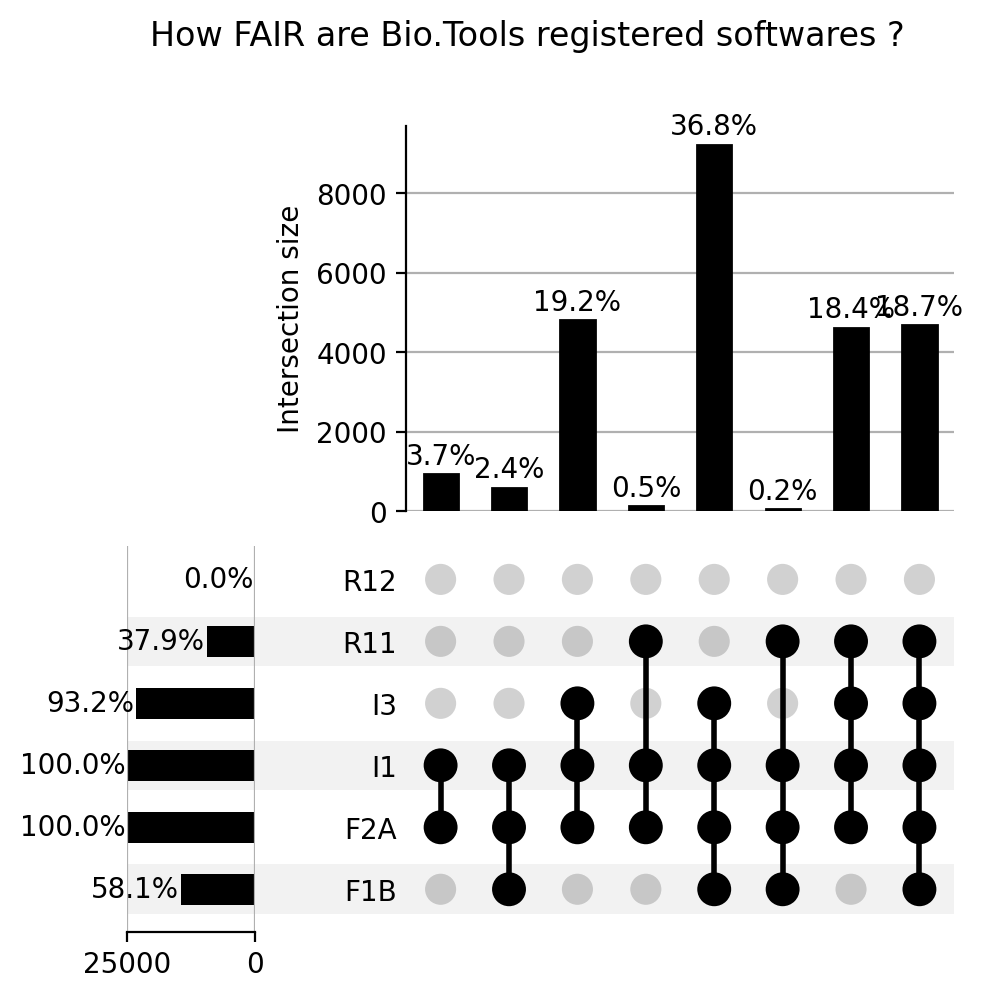

In [13]:
upset = UpSet(df_upset, subset_size='count', sort_categories_by=None, orientation='horizontal', show_percentages=True)

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 200 

params = {'legend.fontsize': 8}
with plt.rc_context(params):
    upset.plot()
plt.suptitle("How FAIR are Bio.Tools registered softwares ?")
plt.savefig('../results/biotools-no-F2B-no-I2-no-R13.png', format="png")
plt.show()